## Analisis exploratorio - SF Bay Area Bike Share

In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15,5)

In [2]:
trips = pd.read_csv('/home/florencia/Datos/Data/sf-bay-area-bike-share/trip.csv', low_memory=False)

trips.columns.values

print(trips.shape)

print(trips.isnull().any())

print(trips.describe())

(669959, 11)
id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool
                  id         duration  start_station_id  end_station_id  \
count  669959.000000    669959.000000     669959.000000   669959.000000   
mean   460382.009899      1107.949846         57.851876       57.837438   
std    264584.458487     22255.437020         17.112474       17.200142   
min      4069.000000        60.000000          2.000000        2.000000   
25%    231082.500000       344.000000         50.000000       50.000000   
50%    459274.000000       517.000000         62.000000       62.000000   
75%    692601.000000       755.000000         70.000000       70.000000   
max    913460.000000  17270400.000000         84.000000       84.00

In [3]:
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M')
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')

trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

In [4]:
trips_con_fecha = trips

# hago un split de la fecha y la hora
trips_con_fecha['year'] = pd.DatetimeIndex(trips_con_fecha['start_date']).year
trips_con_fecha['month'] = pd.DatetimeIndex(trips_con_fecha['start_date']).month
trips_con_fecha['day'] = pd.DatetimeIndex(trips_con_fecha['start_date']).day
trips_con_fecha['hour'] = pd.DatetimeIndex(trips_con_fecha['start_date']).hour
trips_con_fecha['minutes'] = pd.DatetimeIndex(trips_con_fecha['start_date']).minute

## Cantidad de trips por año

<IPython.core.display.Javascript object>


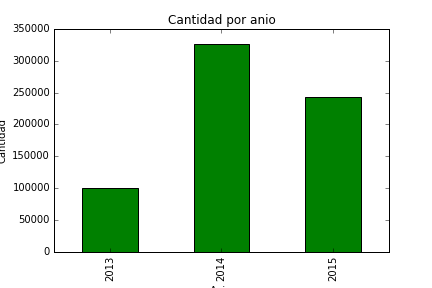

In [5]:
%matplotlib notebook
tri=trips_con_fecha.groupby(by='year').count()['id']
#tri=trips_con_fecha['anio'].value_counts().describe()
ax1=tri.plot(kind='bar',title='Cantidad por anio',color='green')
ax1.set_ylabel('Cantidad')
ax1.set_xlabel('Anio')

## Cantidad por dia de la semana

<IPython.core.display.Javascript object>


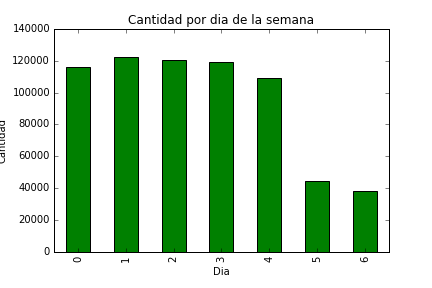

In [6]:
%matplotlib notebook
trips_con_fecha['day']= trips_con_fecha['start_date'].dt.dayofweek
tri=trips_con_fecha.groupby(by='day').count()['id']
#tri=trips_con_fecha['dia'].value_counts()
ax2=tri.plot(kind='bar',title='Cantidad por dia de la semana',color='green')
ax2.set_ylabel('Cantidad')
ax2.set_xlabel('Dia')

## Cantidad por tipo de suscripcion

<IPython.core.display.Javascript object>


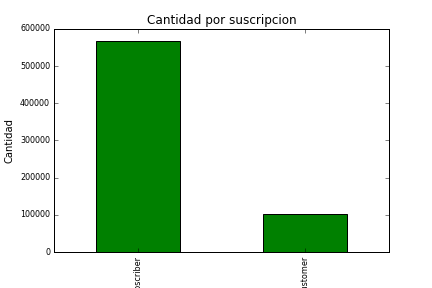

In [7]:
# Cantidad total de cada suscripcion
%matplotlib notebook
sub=trips_con_fecha['subscription_type'].value_counts()
su=sub.plot(kind='bar',title='Cantidad por suscripcion',fontsize= 8, color='green')
su.set_xlabel('Tipo de Suscripcion')
su.set_ylabel('Cantidad')

## Cantidad de bicicletas alquiladas por hora

<IPython.core.display.Javascript object>


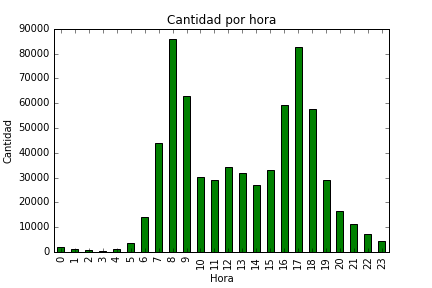

In [8]:
%matplotlib notebook
#sub=trips_con_fecha['hora'].value_counts()
sub=trips_con_fecha.groupby(by='hour').count()['id']
su2=sub.plot(kind='bar',title='Cantidad por hora',color='green')
su2.set_xlabel('Hora')
su2.set_ylabel('Cantidad')

## Duraciones en segundos

<IPython.core.display.Javascript object>


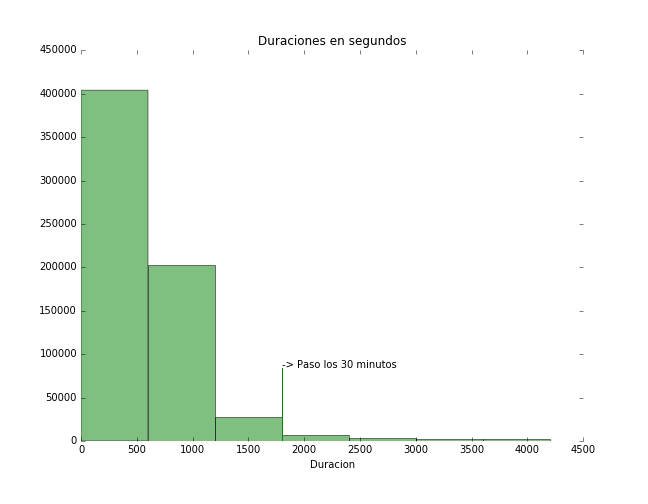

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [9]:
plt.figure(figsize = [9,7])
h = plt.hist(trips_con_fecha['duration'].values,range = [0,4200],alpha = .5,bins=7,facecolor='green')
plt.plot([1800,1800],[0,float(trips_con_fecha.shape[0]/8)],linestyle = '-')
plt.text(1800,float(trips_con_fecha.shape[0]/8),'-> Paso los 30 minutos')
plt.title('Duraciones en segundos')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Duracion')
plt.legend()

## Porcentaje de bicicletas sacadas que no cumplieron el maximo de 30 minutos

In [10]:
val=trips_con_fecha.loc[trips_con_fecha['duration'] > 1800,:]['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

5.23539500178


## Porcentaje de bicicletas sacadas que no cumplieron el maximo de 30 minutos para 24-hour or 3-day membership

In [11]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Customer'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

4.66700201057


## Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos para annual membership

In [12]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Subscriber'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

0.568392991213


## Ratio: cantidad de bicis devueltas/cantidad de bici alquiladas en una estacion

In [13]:
# Cantidad total de trips que salieron de cada estacion
estacion_count=trips_con_fecha['start_station_name'].value_counts()
ES=trips_con_fecha.loc[trips_con_fecha['start_station_name']==trips_con_fecha['end_station_name'],:]
trips_con_mismaE=ES['start_station_name'].value_counts()
ratioMISMAES=trips_con_mismaE/ estacion_count
top20=ratioMISMAES.sort_values(ascending=False)[:20]
top20

University and Emerson                   0.591270
San Mateo County Center                  0.292683
Redwood City Public Library              0.253521
San Jose Civic Center                    0.245295
Broadway at Main                         0.238806
California Ave Caltrain Station          0.207602
Palo Alto Caltrain Station               0.187589
Franklin at Maple                        0.169643
Arena Green / SAP Center                 0.145722
Rengstorff Avenue / California Street    0.141718
Cowper at University                     0.122999
Japantown                                0.120419
Park at Olive                            0.120000
Stanford in Redwood City                 0.112385
Evelyn Park and Ride                     0.107978
Mezes Park                               0.105572
Redwood City Caltrain Station            0.099743
San Jose City Hall                       0.095696
San Salvador at 1st                      0.094563
SJSU 4th at San Carlos                   0.094017


## Top 20 de las estaciones desde las cuales salen mas bicicletas

<IPython.core.display.Javascript object>


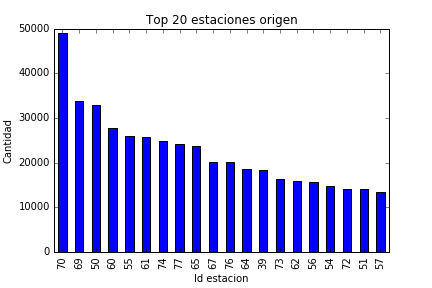

In [14]:
%matplotlib notebook

count_start_station = trips['start_station_id'].value_counts()
count_start_station

css = count_start_station[:20].plot('bar', title = 'Top 20 estaciones origen')
css.set_ylabel('Cantidad')
css.set_xlabel('Id estacion')

## Top 20 de las estaciones a las cuales llegan más bicicletas

<IPython.core.display.Javascript object>


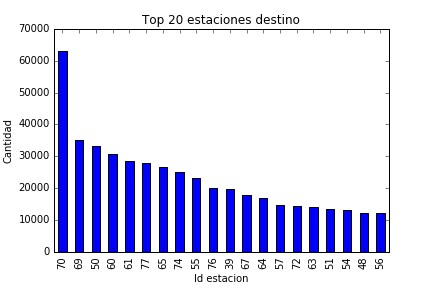

In [15]:
%matplotlib notebook

count_end_station = trips['end_station_id'].value_counts()
count_end_station

ces = count_end_station[:20].plot('bar', title = 'Top 20 estaciones destino' )
ces.set_ylabel('Cantidad')
ces.set_xlabel('Id estacion')

## Las 10 estaciones con mas bicicletas de salida (de lunes a viernes)

In [16]:
#top_salidas_semana=trips_con_fecha[['date','start_station_name']]
# Los dias van de 0 a 6
semana=trips_con_fecha.loc[(trips_con_fecha['day']== 0) | (trips_con_fecha['day']== 1) |(trips_con_fecha['day']== 2) | (trips_con_fecha['day']== 3)| (trips_con_fecha['day']== 4),:]
semana_stats=semana['start_station_name'].value_counts()

In [17]:
top10_salida_lu_vie=semana_stats.sort_values(ascending=False)[:10]
top10_salida_lu_vie

San Francisco Caltrain (Townsend at 4th)         46234
San Francisco Caltrain 2 (330 Townsend)          31706
Harry Bridges Plaza (Ferry Building)             26520
Temporary Transbay Terminal (Howard at Beale)    25084
2nd at Townsend                                  22723
Steuart at Market                                22594
Market at Sansome                                21932
Townsend at 7th                                  21655
Embarcadero at Sansome                           21094
Market at 10th                                   17968
Name: start_station_name, dtype: int64

## Las 10 estaciones con menos bicicletas de salida (de lunes a viernes)

In [18]:
top10_lu_vie=semana_stats.sort_values(ascending=True)[:10]
top10_lu_vie

San Jose Government Center          22
Broadway at Main                    52
Franklin at Maple                  148
Redwood City Public Library        157
San Mateo County Center            258
Mezes Park                         287
Redwood City Medical Center        294
Stanford in Redwood City           416
Park at Olive                      574
California Ave Caltrain Station    701
Name: start_station_name, dtype: int64

## Las 10 estaciones con mas bicicletas de salida (sabado y domingo)

In [19]:
finde=trips_con_fecha.loc[(trips_con_fecha['day']==5) | (trips_con_fecha['day']==6),:]
finde_stats=finde['start_station_name'].value_counts()
top10=finde_stats.sort_values(ascending=False)[:10]
top10

Embarcadero at Sansome                      6619
Harry Bridges Plaza (Ferry Building)        6414
Market at 4th                               3486
Embarcadero at Bryant                       3227
2nd at Townsend                             3114
Powell Street BART                          2990
Grant Avenue at Columbus Avenue             2864
San Francisco Caltrain (Townsend at 4th)    2858
Powell at Post (Union Square)               2357
Market at 10th                              2304
Name: start_station_name, dtype: int64

## Las 10 estaciones con menos bicicletas de salida (sabado y domingo)

In [20]:
top10_Sab_Dom=finde_stats.sort_values(ascending=True)[:10]
top10_Sab_Dom

San Jose Government Center           1
Broadway at Main                    15
Redwood City Medical Center         17
Stanford in Redwood City            20
San Mateo County Center             29
Mezes Park                          54
Redwood City Public Library         56
Santa Clara County Civic Center     66
Franklin at Maple                   76
Adobe on Almaden                   115
Name: start_station_name, dtype: int64

## Top 15 viajes más comunes según origen y destino

/usr/lib/python2.7/dist-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


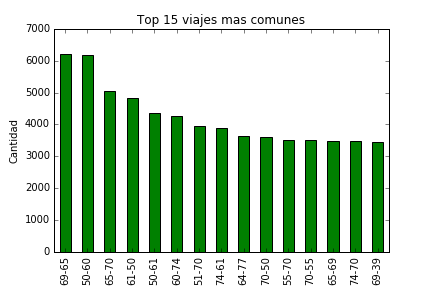

In [21]:
%matplotlib notebook

common_trips = trips[['start_station_id','end_station_id']]

common_trips.start_station_id = common_trips.start_station_id.astype(str)
common_trips.end_station_id = common_trips.end_station_id.astype(str)

common_trips['start_end'] = (common_trips.start_station_id + '-' + common_trips.end_station_id)

aux = common_trips['start_end'].value_counts()
ct = aux[:15].plot(kind='bar',title='Top 15 viajes mas comunes',color='green')
ct.set_ylabel('Cantidad')
ct.set_xlabel('Origen - Destino')

## Las 10 estaciones mas populares de salida de dia laboral en horario pico(7 a 9 y 16 a 18)

In [22]:
trips_con_fecha['yearE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).year
trips_con_fecha['monthE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).month
trips_con_fecha['dayE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).day
trips_con_fecha['hourE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).hour
trips_con_fecha['minutesE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).minute

semana_hora_pico=trips_con_fecha.loc[((trips_con_fecha['hourE']>= 7 )& (trips_con_fecha['hourE']<=9)) |((trips_con_fecha['hourE']>= 16) & \
                    (trips_con_fecha['hourE']<=18)),:]

estacionesHorarioPico=semana_hora_pico['start_station_name'].value_counts()
top10estacionesHorarioPico=estacionesHorarioPico.sort_values(ascending=False)[:10]
top10estacionesHorarioPico


San Francisco Caltrain (Townsend at 4th)         35048
San Francisco Caltrain 2 (330 Townsend)          23234
Temporary Transbay Terminal (Howard at Beale)    19259
Harry Bridges Plaza (Ferry Building)             18970
Steuart at Market                                16249
2nd at Townsend                                  15842
Townsend at 7th                                  14386
Embarcadero at Sansome                           14137
Market at Sansome                                12976
Market at 10th                                   11840
Name: start_station_name, dtype: int64

## Las 10 viajes mas populares de dia de semana en horario pico(7 a 9 y 16 a 18)

In [23]:
viajesPopulares = semana_hora_pico[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top20=viajesPopulares.sort_values(ascending=False)[:10]
top20

start_station_name                             end_station_name                        
San Francisco Caltrain 2 (330 Townsend)        Townsend at 7th                             3658
2nd at Townsend                                Harry Bridges Plaza (Ferry Building)        3264
Harry Bridges Plaza (Ferry Building)           2nd at Townsend                             3243
Embarcadero at Folsom                          San Francisco Caltrain (Townsend at 4th)    3191
Townsend at 7th                                San Francisco Caltrain (Townsend at 4th)    3182
Embarcadero at Sansome                         Steuart at Market                           3093
Harry Bridges Plaza (Ferry Building)           Embarcadero at Sansome                      3075
Steuart at Market                              2nd at Townsend                             2945
Temporary Transbay Terminal (Howard at Beale)  San Francisco Caltrain (Townsend at 4th)    2920
Steuart at Market                              S

## Top10 de viajes con mayor promedio de duracion, de dia de semana y en horario pico

In [24]:
info_viajes_Populares = semana_hora_pico[['start_station_name','end_station_name','duration']].groupby(['start_station_name','end_station_name'])['duration'].agg([np.size,np.mean,np.std])
info_viajes_Populares.loc[info_viajes_Populares['size']>2000,:].sort_values('mean',ascending=False).head(10)

size  \
start_station_name                            end_station_name                                      
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         3075   
                                              San Francisco Caltrain (Townsend at 4th)       2182   
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                              2039   
Market at 10th                                San Francisco Caltrain (Townsend at 4th)       2535   
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)           2681   
                                              Temporary Transbay Terminal (Howard at Beale)  2599   
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)       2709   
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)       3191   
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                              2357   
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)       2920   

                                                                                                    mean  \
start_station_name                            end_station_name                                             
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         1063.781138   
                                              San Francisco Caltrain (Townsend at 4th)        831.148029   
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                               823.132908   
Market at 10th                                San Francisco Caltrain (Townsend at 4th)        786.864300   
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)            745.986945   
                                              Temporary Transbay Terminal (Howard at Beale)   726.017314   
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)        725.410853   
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)        701.274835   
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                               699.029699   
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)        644.416438   

                                                                                                     std  
start_station_name                            end_station_name                                            
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         2513.807266  
                                              San Francisco Caltrain (Townsend at 4th)        774.523982  
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                              2452.355243  
Market at 10th                                San Francisco Caltrain (Townsend at 4th)       4523.796296  
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)           1281.758765  
                                              Temporary Transbay Terminal (Howard at Beale)  1632.042390  
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)       1512.311844  
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)       2440.397087  
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                               207.878007  
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)        850.007864

## Top10 de viajes de dia de semana y en horario pico con duracion mas variable

In [25]:
info_viajes_Populares.loc[info_viajes_Populares['size']>2000,:].sort_values('std',ascending=False).head(10)

,,size,mean,std
start_station_name,end_station_name,,,
Market at 10th,San Francisco Caltrain (Townsend at 4th),2535,786.864300,4523.796296
Market at Sansome,2nd at South Park,2262,443.255526,2880.419426
Mountain View Caltrain Station,Mountain View City Hall,2085,411.705995,2692.106160
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3075,1063.781138,2513.807266
San Francisco Caltrain (Townsend at 4th),Market at Sansome,2039,823.132908,2452.355243
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3191,701.274835,2440.397087
Steuart at Market,Embarcadero at Sansome,2025,632.006420,1707.484570
San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),2599,726.017314,1632.042390
Steuart at Market,San Francisco Caltrain (Townsend at 4th),2709,725.410853,1512.311844


## Los 10 viajes mas populares de fin de semana

In [26]:
weekend=trips_con_fecha.loc[(trips_con_fecha['day']== 5) | (trips_con_fecha['day']== 6),: ]
weekend_popular_trips = weekend[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top10weekend=weekend_popular_trips.sort_values(ascending=False)[:10]
top10weekend

start_station_name                    end_station_name                    
Harry Bridges Plaza (Ferry Building)  Embarcadero at Sansome                  1550
Embarcadero at Sansome                Harry Bridges Plaza (Ferry Building)     907
                                      Embarcadero at Sansome                   873
Harry Bridges Plaza (Ferry Building)  Harry Bridges Plaza (Ferry Building)     841
Embarcadero at Bryant                 Embarcadero at Sansome                   483
                                      Harry Bridges Plaza (Ferry Building)     459
Embarcadero at Vallejo                Embarcadero at Sansome                   451
University and Emerson                University and Emerson                   448
2nd at Townsend                       Harry Bridges Plaza (Ferry Building)     415
Powell Street BART                    Market at 10th                           412
Name: id, dtype: int64

## Trips y weather

In [27]:
# Por un lado me quedo con aquellos trips que duran un día o menos

trips_menos_1 = trips.loc[trips.duration <= 86400,:]

trips_menos_1['year'] = pd.DatetimeIndex(trips_menos_1['start_date']).year
trips_menos_1['month'] = pd.DatetimeIndex(trips_menos_1['start_date']).month
trips_menos_1['day'] = pd.DatetimeIndex(trips_menos_1['start_date']).day

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [30]:
stations = pd.read_csv('/home/florencia/Datos/Data/sf-bay-area-bike-share/station.csv', low_memory=False)

# A cada estación le agrego el zip_code correspondiente a su ciudad, informacion obtenida en
# www.unitedstateszipcodes.org

stations_SF = stations.loc[stations.city.str.contains('San Francisco'),:]
stations_SF['zip_code'] = 94107

stations_SJ = stations.loc[stations.city.str.contains('San Jose'),:]
stations_SJ['zip_code'] = 95113

stations_MV = stations.loc[stations.city.str.contains('Mountain View'),:]
stations_MV['zip_code'] = 94041

stations_RC = stations.loc[stations.city.str.contains('Redwood City'),:]
stations_RC['zip_code'] = 94063

stations_PA = stations.loc[stations.city.str.contains('Palo Alto'),:]
stations_PA['zip_code'] = 94301

frames = [stations_SF, stations_SJ, stations_MV, stations_RC, stations_PA]

stations = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [31]:
weather = pd.read_csv('/home/florencia/Datos/Data/sf-bay-area-bike-share/weather.csv', low_memory=False)

weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')

# Para separar por anio , mes y dia
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month
weather['day'] = pd.DatetimeIndex(weather['date']).day

## Cantidad de eventos climáticos registrados en cada ciudad

<IPython.core.display.Javascript object>


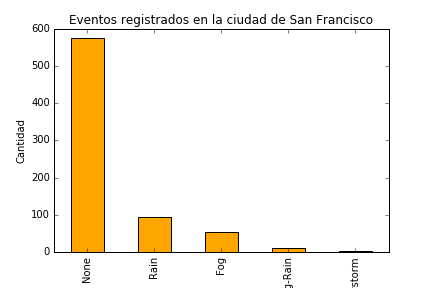

In [32]:
weather.loc[weather['events'] == 'rain', 'events'] = "Rain"
weather.loc[weather['events'].isnull(), 'events'] = "None"

weatherSF = weather.loc[weather.zip_code == 94107,:]

%matplotlib notebook
sub_weatherSF = weatherSF['events'].value_counts()
sub_plot=sub_weatherSF.plot(kind='bar',title='Eventos registrados en la ciudad de San Francisco',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


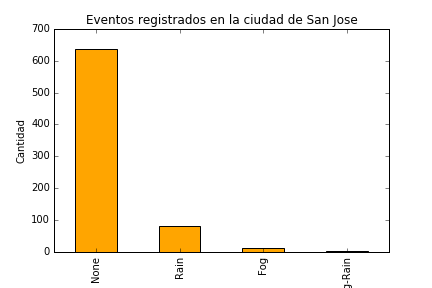

In [33]:
weatherSJ = weather.loc[weather.zip_code == 95113,:]

%matplotlib notebook
sub_weatherSJ = weatherSJ['events'].value_counts()
sub_plot=sub_weatherSJ.plot(kind='bar',title='Eventos registrados en la ciudad de San Jose',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


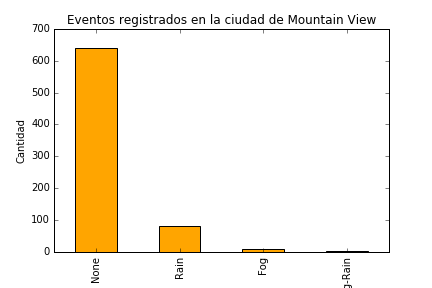

In [34]:
weatherMV = weather.loc[weather.zip_code == 94041,:]

%matplotlib notebook
sub_weatherMV = weatherMV['events'].value_counts()
sub_plot=sub_weatherMV.plot(kind='bar',title='Eventos registrados en la ciudad de Mountain View',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


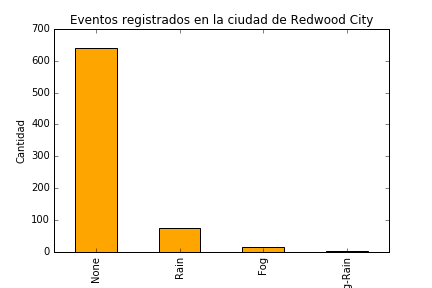

In [35]:
weatherRC = weather.loc[weather.zip_code == 94063,:]

%matplotlib notebook
sub_weatherRC = weatherRC['events'].value_counts()
sub_plot=sub_weatherRC.plot(kind='bar',title='Eventos registrados en la ciudad de Redwood City',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


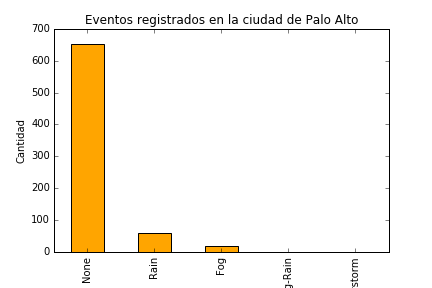

In [36]:
weatherPA = weather.loc[weather.zip_code == 94301,:]

%matplotlib notebook
sub_weatherPA = weatherPA['events'].value_counts()
sub_plot=sub_weatherPA.plot(kind='bar',title='Eventos registrados en la ciudad de Palo Alto',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

In [37]:
weather.events.value_counts()

None                 3143
Rain                  390
Fog                   112
Fog-Rain               17
Rain-Thunderstorm       3
Name: events, dtype: int64

In [38]:
# Reemplazo id por star_station_id para poder hacer el merge con trips
stations.rename(columns={'id': 'start_station_id'}, inplace=True)

# Creo un nuevo data frame con los trips con duracion menor o igual a un dia
# y el zip_code de la ciudad donde se encuentra a estacion de partida
trips_stations = pd.merge(trips_menos_1,stations,how='left',on=['start_station_id'])

# Elimino el zip_code que tiene que ver con el usuario de la bicicleta, no aporta informacion
trips_stations.drop(labels='zip_code_x', axis=1)

trips_stations.rename(columns={'zip_code_y': 'zip_code'}, inplace=True)

trips_stations.tail(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,dayE,hourE,minutesE,name,lat,long,dock_count,city,installation_date,zip_code
669653,432964,169,2014-09-01 07:32:00,Embarcadero at Bryant,54,2014-09-01 07:35:00,Embarcadero at Folsom,51,496,Subscriber,...,1,7,35,Embarcadero at Bryant,37.787152,-122.388013,15,San Francisco,8/20/2013,94107
669654,432960,5667,2014-09-01 07:03:00,Japantown,9,2014-09-01 08:38:00,Japantown,9,56,Customer,...,1,8,38,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013,95113
669655,432959,441,2014-09-01 06:58:00,Market at 10th,67,2014-09-01 07:05:00,Market at Sansome,77,617,Subscriber,...,1,7,5,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013,94107
669656,432957,398,2014-09-01 05:54:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-09-01 06:00:00,Steuart at Market,74,561,Subscriber,...,1,6,0,Yerba Buena Center of the Arts (3rd @ Howard),37.784878,-122.401014,19,San Francisco,8/23/2013,94107
669657,432952,240,2014-09-01 04:59:00,South Van Ness at Market,66,2014-09-01 05:03:00,Civic Center BART (7th at Market),72,292,Subscriber,...,1,5,3,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,94107
669658,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,...,1,4,32,Powell Street BART,37.783871,-122.408433,19,San Francisco,8/25/2013,94107
669659,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,...,1,5,8,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,23,San Francisco,8/20/2013,94107
669660,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,...,1,0,14,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,94107
669661,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,Customer,...,1,0,15,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,94107
669662,432947,569,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,318,Customer,...,1,0,15,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,94107


In [39]:
# Finalmente, hago un merge entre trips y weather por fecha y zip_code
# de ciudad de inicio del trip
trips_weather= pd.merge(trips_stations, weather,how='left',on=['year','month','day','zip_code'])

trips_weather.describe()

,id,duration,start_station_id,end_station_id,bike_id,year,month,day,hour,minutes,...,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees
count,669663.000000,669663.000000,669663.000000,669663.000000,669663.000000,669663.000000,669663.000000,669663.000000,669663.000000,669663.000000,...,669649.000000,669649.000000,669511.000000,669511.000000,669511.000000,669649.000000,669649.000000,649437.000000,669649.000000,669649.000000
mean,460398.031447,987.318563,57.858736,57.843362,427.612768,2014.212729,6.476820,15.739790,13.096172,29.381441,...,30.014560,29.961188,10.018591,9.613847,8.070039,18.632731,7.986272,23.865095,3.670259,260.303843
std,264579.817196,3260.624779,17.106206,17.194332,153.413516,0.683837,3.276743,8.664846,4.554160,17.691247,...,0.125309,0.124491,0.571397,1.012004,2.735660,5.644486,3.530920,7.965381,2.254037,67.177592
min,4069.000000,60.000000,2.000000,2.000000,9.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,...,29.430000,28.980000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,231125.500000,344.000000,50.000000,50.000000,334.000000,2014.000000,4.000000,8.000000,9.000000,13.000000,...,29.920000,29.870000,10.000000,10.000000,7.000000,15.000000,5.000000,20.000000,2.000000,256.000000
50%,459289.000000,517.000000,62.000000,62.000000,440.000000,2014.000000,7.000000,16.000000,13.000000,30.000000,...,30.000000,29.950000,10.000000,10.000000,10.000000,18.000000,8.000000,23.000000,4.000000,277.000000
75%,692614.500000,755.000000,70.000000,70.000000,546.000000,2015.000000,9.000000,23.000000,17.000000,45.000000,...,30.100000,30.040000,10.000000,10.000000,10.000000,21.000000,10.000000,28.000000,5.000000,297.000000
max,913460.000000,86381.000000,84.000000,84.000000,878.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,...,30.410000,30.370000,20.000000,20.000000,20.000000,128.000000,23.000000,114.000000,8.000000,2772.000000


## Relacion entre duracion promedio en segundos y temperatura promedio en Fahrenheit

<IPython.core.display.Javascript object>


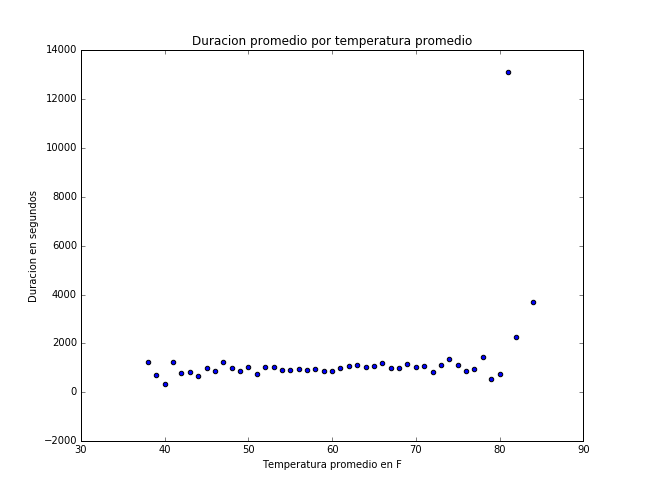

In [40]:
# Convierto la serie obtenida en un Dataframe para el plot
aux_df = trips_weather.groupby('mean_temperature_f')['duration'].mean().to_frame()

aux_df.reset_index(inplace=True)
aux_df.columns = ['mean_temperature_f','mean_duration']

%matplotlib notebook
plt.figure(figsize = [9,7])

sc1 = plt.scatter(aux_df['mean_temperature_f'],aux_df['mean_duration'],alpha =1)
plt.title('Duracion promedio por temperatura promedio')
plt.xlabel('Temperatura promedio en F')
plt.ylabel('Duracion en segundos')
## podemos ver que a medida que aumentan las temperaturas tambien lo hace el promedio de duracion de lo trips

## Correlacion entre la velocidad promedio del viento y la duracion de los trips
## ¿esta bien usar este plot??? ¿que conclusiones podemos sacar??

<IPython.core.display.Javascript object>


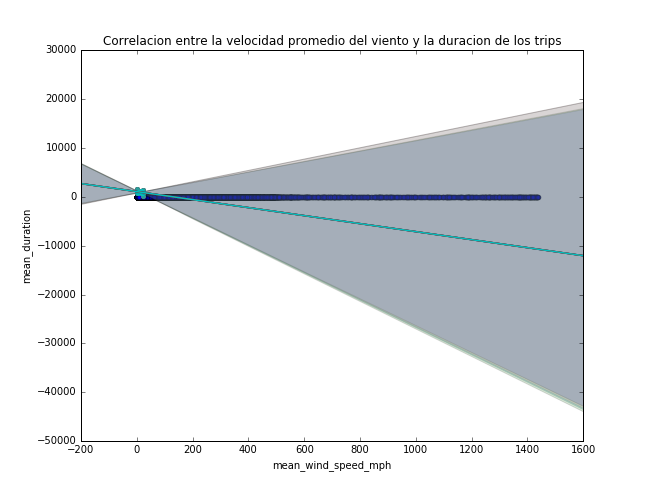

In [41]:
#Analizo como varia la duracion de los trips la velocidad promedio del viento(mean_wind_speed_mph)

trips_weather['duration_hs'] = trips_weather['duration']/60

%matplotlib notebook
plt.figure(figsize = [9,7])
sc = plt.scatter(trips_weather['duration_hs'],trips_weather['mean_wind_speed_mph'],alpha =0.25)
plt.title('Correlacion entre la velocidad promedio del viento y la duracion de los trips')
plt.ylabel('Velocidad promedio del viento en mph')
plt.xlabel('Duracion en horas')

## Duracion promedio de los trips por velocidad promedio del viento

In [45]:
# Convierto la serie obtenida en un Dataframe para el plot
aux_df = trips_weather.groupby('mean_wind_speed_mph')['duration'].mean().to_frame()

aux_df.reset_index(inplace=True)
aux_df.columns = ['mean_wind_speed_mph','mean_duration']

ax = sns.regplot(x=aux_df['mean_wind_speed_mph'], y=aux_df['mean_duration'], data=aux_df)


## La conclusion podria ser que a la gente no le gusta andar en bicicleta cuando hay mucho viento
## por eso a medida que la velocidad del viento es mayor los viajes tienden a durar menos en promedio


## Correlacion entre la velocidad maxima de las rafagas de viento y la duracion de 
## ¿esta bien usar este plot?????

<IPython.core.display.Javascript object>


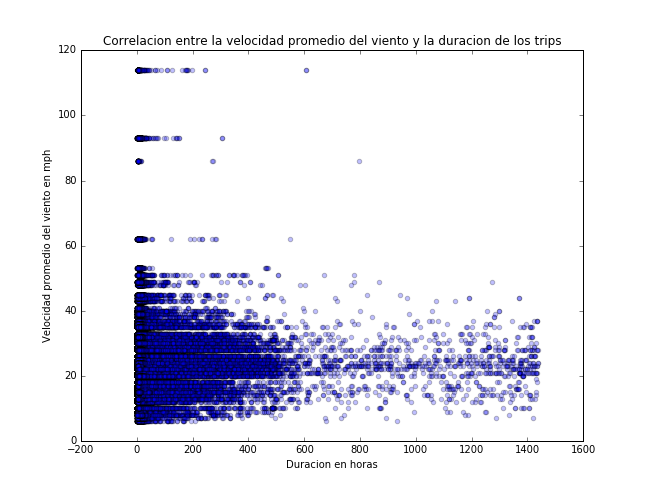

In [46]:
%matplotlib notebook
plt.figure(figsize = [9,7])
sc = plt.scatter(trips_weather['duration_hs'],trips_weather['max_gust_speed_mph'],alpha =0.25)
plt.title('Correlacion entre la velocidad promedio del viento y la duracion de los trips')
plt.ylabel('Velocidad promedio del viento en mph')
plt.xlabel('Duracion en horas')

## Cantidad de trips segun velocidad promedio del viento (falta terminar)

<IPython.core.display.Javascript object>


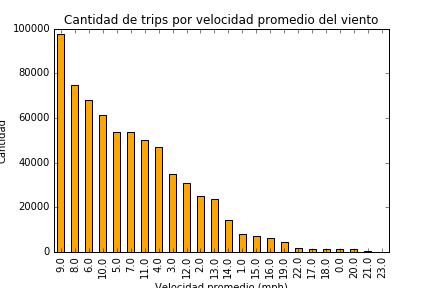

In [47]:
#quiero analizar la velocidad promedio del viento(mean_wind_speed_mph)---->> me quedo con el zipcode 94107
stats_viento_cant = trips_weather[['mean_wind_speed_mph']]
#stats_viento_cant['count'] = 1

#aux = stats_viento_cant.groupby(['mean_wind_speed_mph'])['count'].sum().to_frame()
#aux.reset_index(inplace=True)

#aux.columns = ['mean_wind_speed_mph','count']

%matplotlib notebook
aux = stats_viento_cant['mean_wind_speed_mph'].value_counts()
sub_plot=aux.plot(kind='bar',title='Cantidad de trips por velocidad promedio del viento',color='orange')
sub_plot.set_xlabel('Velocidad promedio (mph)')
sub_plot.set_ylabel('Cantidad')

## claramente se puede ver que mientras aumenta la velocidad promedio del viento la cantidad de trips disminuye

## falta agregar heatmap. tiene sentido el heatmap o conviene analizar la correlacion entre otras variables?

<IPython.core.display.Javascript object>


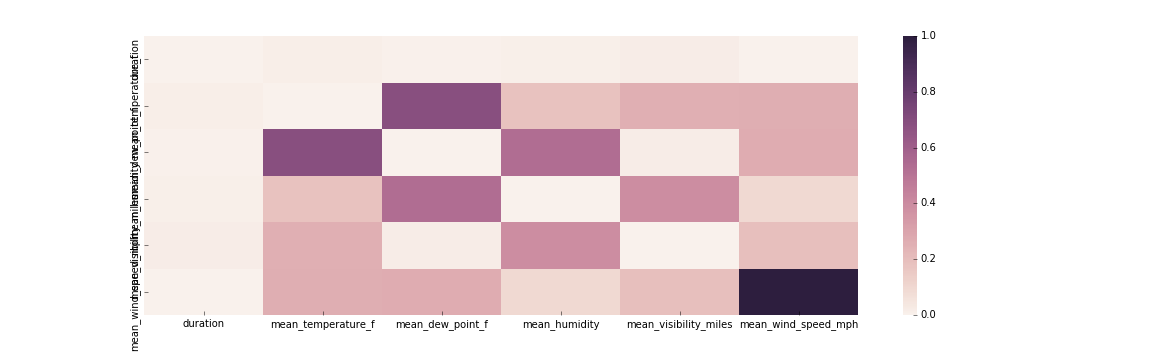

In [48]:
# Para los viajes que duran menos de un dia, me sigo quedando con el zip_code 94107
# analizo la relacion que existe entre las diferentes variables, mientras más oscuro, más 
# fuerte es la relación

# Para los viajes que duran menos de un dia, me sigo quedando con el zip_code 94107
# analizo la relacion que existe entre las diferentes variables, mientras más oscuro, más 
# fuerte es la relación

fig, ax = plt.subplots(figsize=(16,5));        # Sample figsize in inches

cor = trips_weather.loc[:,['duration','mean_temperature_f','mean_dew_point_f','mean_humidity','mean_visibility_miles','mean_wind_speed_mph']]\
        .corr().abs()
cor.values[[np.arange(5)]*2] = 0
sns.heatmap(cor);